# First draft
## Libraries and read in data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from time import time #this is to determine runtime of k-means clustering algorithm

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


#read in data from csv file
df = pd.read_csv("ward_1_features.csv", header=None)
df.head()
df.shape

(26, 4096)

## Standardise data

In [2]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# X_std

## Do PCA & visualise how many pc's we need

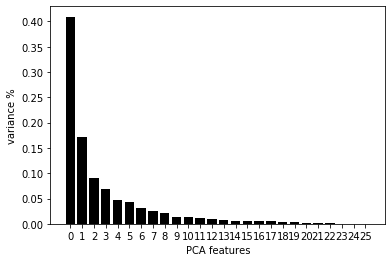

In [3]:
# Create a PCA instance: pca
pca = PCA(n_components=26) #note number of pc's can't exceed number of obs
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

# K means
## Using inertia and silhouette score to determine k
This is a cool approach where they vary k and see what a scree plot looks like to minimise inertia
<br>
(From kmeans_try2)

0.451681337114773

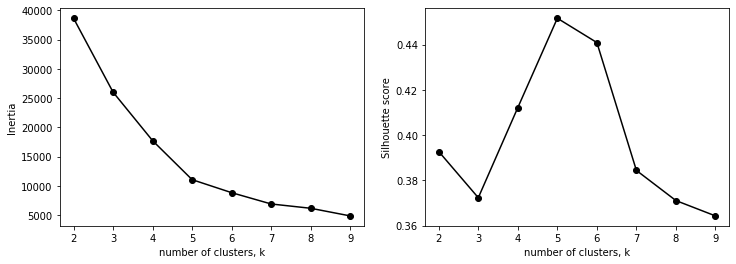

In [9]:
ks = range(2, 10)
inertias = []
sil = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++')
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    kmeans_model = KMeans(init='k-means++', n_clusters=k, n_init=10).fit(PCA_components.iloc[:,:3])
    labels = kmeans_model.labels_
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
    #Append sillhouette scores
    sil.append(metrics.silhouette_score(PCA_components.iloc[:,:3], labels, metric='euclidean'))
    
    
#both inertia and sil
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(ks, inertias, '-o', color='black')
ax[0].set_xlabel('number of clusters, k')
ax[0].set_ylabel('Inertia')
ax[0].set_xticks(ks)

ax[1].plot(ks, sil, '-o', color='black')
ax[1].set_xlabel('number of clusters, k')
ax[1].set_ylabel('Silhouette score')
ax[1].set_xticks(ks)

#for code on silhouettes:
#https://towardsdatascience.com/k-means-clustering-for-unsupervised-machine-learning-afd96fbd37ac
kmeans_model = KMeans(init='k-means++', n_clusters=5, n_init=10).fit(PCA_components.iloc[:,:3])
labels = kmeans_model.labels_
metrics.silhouette_score(PCA_components.iloc[:,:3], labels, metric='euclidean')


## Some notes on silhouette measure:
from https://towardsdatascience.com/k-means-clustering-for-unsupervised-machine-learning-afd96fbd37ac
<br>
Silhouette Score: Silhouette score is based on a combination of cluster Cohesion (how close points in a cluster are relative to each other) and Separation (how far the clusters are relative to each other).
Silhouette score is between -1 (poor clustering) and +1 (excellent clustering).

## Cool output values for different k means algorithms
This is from kmeans_try1 and shows the following: initial cluster centroids, time, inertia, homogeneity etc.

In [5]:
n_samples, n_features = X_std.shape
n_digits = 5

km = KMeans(init='k-means++', n_clusters=5, n_init=10).fit(PCA_components.iloc[:,:3])

km.inertia_

km.cluster_centers_ #5 cluster centers with pc-values of first 3 pc's

km.labels_ #which cluster it was assigned to

array([0, 1, 0, 1, 2, 4, 1, 1, 1, 2, 4, 4, 4, 2, 1, 3, 2, 2, 2, 2, 3, 3,
       3, 3, 1, 1])

Text(0, 0.5, 'PCA 2')

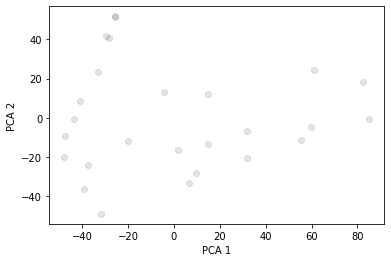

In [25]:
#TOO FEW OBSERVATIONS TO BE MEANINGFUL

#visualise pc's
# plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')